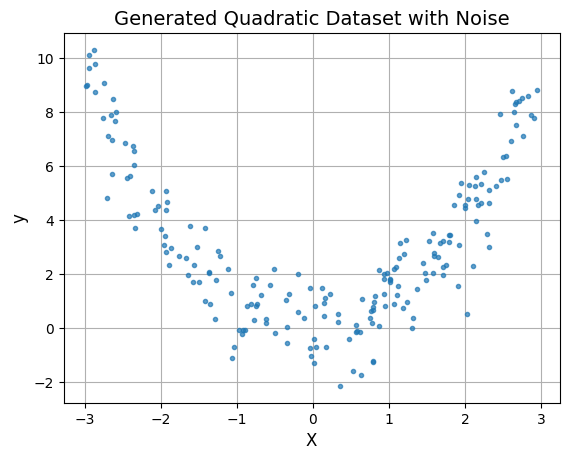

In [1]:
# Let's test a Gradient Boosted Regression Tree model by creating an example using a quadratic function

import numpy as np
import matplotlib.pyplot as plt

# Generate 200 data points uniformly distributed between -3 and 3
m = 200
X = 6 * np.random.rand(m, 1) - 3

# Create target values following the quadratic function y = x^2 with added Gaussian noise
y = X**2 + np.random.randn(m, 1)

# Plot the data
plt.plot(X, y, ".", alpha=0.7)
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Generated Quadratic Dataset with Noise", fontsize=14)
plt.grid(True)
plt.show()

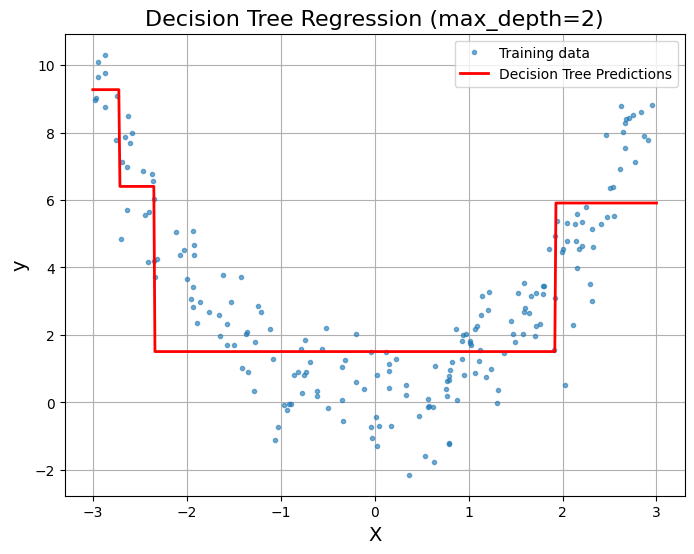

In [2]:
# Now let's train a single Decision Tree Regressor on the quadratic dataset

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create and train a Decision Tree Regressor with a max depth of 2
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

# Create a smooth curve of predictions using evenly spaced values
X_new = np.linspace(-3, 3, 500).reshape(-1, 1)
y_pred = tree_reg1.predict(X_new)

# Plot the original data and the tree's predictions
plt.figure(figsize=(8, 6))
plt.plot(X, y, ".", alpha=0.6, label="Training data")  # Scatter of noisy quadratic data
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Decision Tree Predictions")  # Predicted curve
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Decision Tree Regression (max_depth=2)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

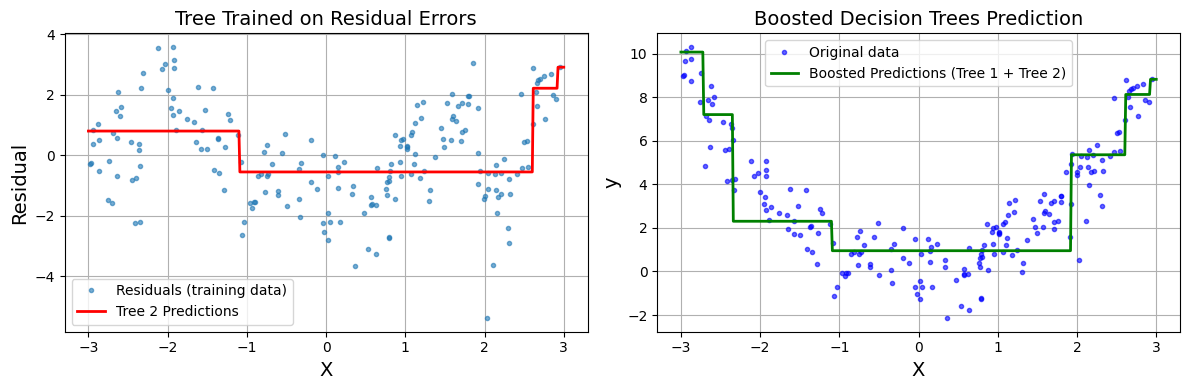

In [3]:
# Now we are going to train a second DecisionTreeRegressor on the residual errors
# These residuals are the differences between the actual target values and the predictions of the first tree

y_residual = y - tree_reg1.predict(X).reshape(-1, 1)  # Calculate residual errors
tree_reg2 = DecisionTreeRegressor(max_depth=2)       # Create a second tree
tree_reg2.fit(X, y_residual)                         # Train it on the residuals

# Predict residuals using the second tree
y_residual_pred = tree_reg2.predict(X_new)

# Compute the boosted predictions by adding the predictions of both trees
y_boosted = y_pred + y_residual_pred

# Plotting results
plt.figure(figsize=(12, 4))

# Plot of the second tree trained on residuals
plt.subplot(121)
plt.plot(X, y_residual, ".", label="Residuals (training data)", alpha=0.6)
plt.plot(X_new, y_residual_pred, "r-", linewidth=2, label="Tree 2 Predictions")
plt.xlabel("X", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.title("Tree Trained on Residual Errors", fontsize=14)
plt.legend()
plt.grid(True)

# Plot of the boosted prediction combining both trees
plt.subplot(122)
plt.plot(X, y, "b.", label="Original data", alpha=0.6)
plt.plot(X_new, y_boosted, "g-", linewidth=2, label="Boosted Predictions (Tree 1 + Tree 2)")
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Boosted Decision Trees Prediction", fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

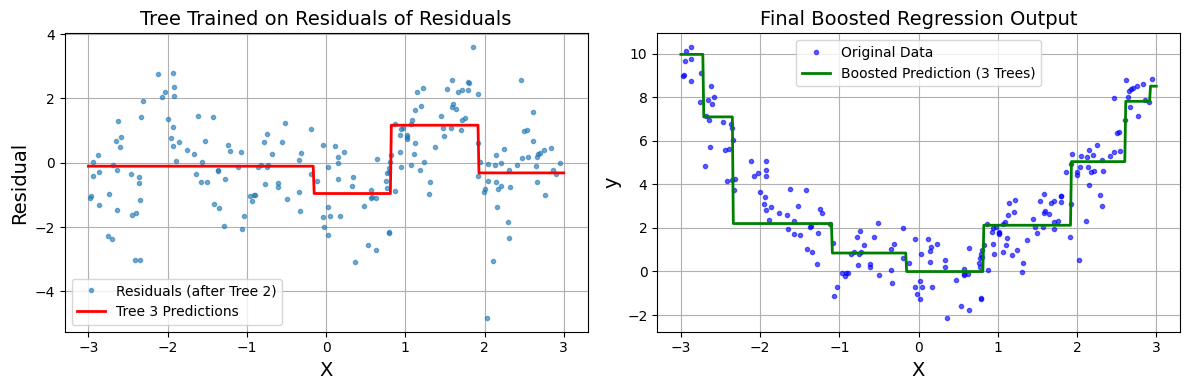

In [4]:
# Now we train a third DecisionTreeRegressor on the residual errors made by the second tree
# This helps to further reduce the remaining prediction errors

y_residual2 = y_residual - tree_reg2.predict(X).reshape(-1, 1)  # Calculate second-level residuals
tree_reg3 = DecisionTreeRegressor(max_depth=2)                  # Create third tree
tree_reg3.fit(X, y_residual2)                                   # Train it on second-level residuals

# Predict the new residuals using the third tree
y_residual2_pred = tree_reg3.predict(X_new)

# Final boosted prediction (sum of predictions from all three trees)
y_boosted = y_pred + y_residual_pred + y_residual2_pred

# Plotting results
plt.figure(figsize=(12, 4))

# Plot of third tree trained on second-level residuals
plt.subplot(121)
plt.plot(X, y_residual2, ".", label="Residuals (after Tree 2)", alpha=0.6)
plt.plot(X_new, y_residual2_pred, "r-", linewidth=2, label="Tree 3 Predictions")
plt.xlabel("X", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.title("Tree Trained on Residuals of Residuals", fontsize=14)
plt.legend()
plt.grid(True)

# Final boosted predictions (Tree 1 + Tree 2 + Tree 3)
plt.subplot(122)
plt.plot(X, y, "b.", label="Original Data", alpha=0.6)
plt.plot(X_new, y_boosted, "g-", linewidth=2, label="Boosted Prediction (3 Trees)")
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Final Boosted Regression Output", fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

d:\hands_on_machine_learning\C7 - Ensemble Learning and Random Forests\env\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
d:\hands_on_machine_learning\C7 - Ensemble Learning and Random Forests\env\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


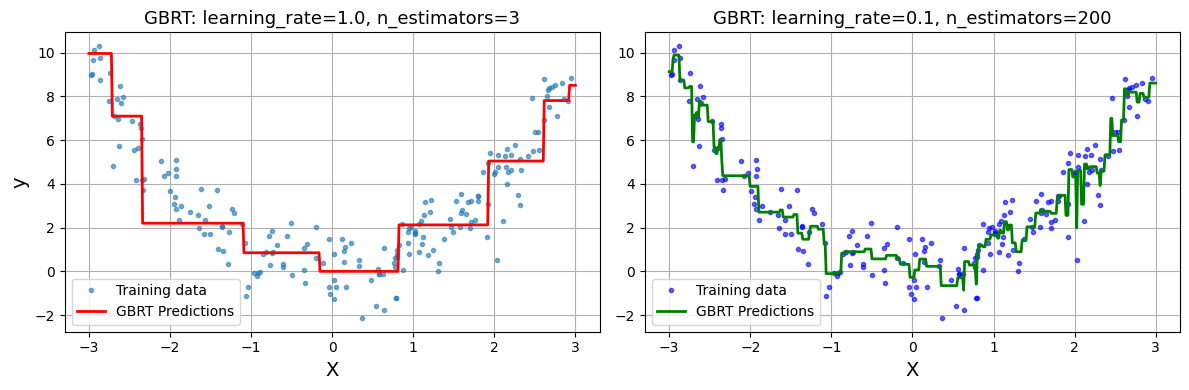

In [5]:
# The more trees we add, the more refined the ensemble model becomes.
# Here, we use GradientBoostingRegressor to automate what we did manually earlier.

from sklearn.ensemble import GradientBoostingRegressor

# First GBRT model: only 3 trees, high learning rate
gbrt1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt1.fit(X, y)  # Train model
y_gbrt1_pred = gbrt1.predict(X_new)  # Make predictions

# Second GBRT model: 200 trees, smaller learning rate (slower but better generalization)
gbrt2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1)
gbrt2.fit(X, y)
y_gbrt2_pred = gbrt2.predict(X_new)

# Plotting the results side by side
plt.figure(figsize=(12, 4))

# Plot: GBRT with fast learning but few estimators
plt.subplot(121)
plt.plot(X, y, ".", label="Training data", alpha=0.6)
plt.plot(X_new, y_gbrt1_pred, "r-", linewidth=2, label="GBRT Predictions")
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("GBRT: learning_rate=1.0, n_estimators=3", fontsize=13)
plt.legend()
plt.grid(True)

# Plot: GBRT with slow learning but many estimators
plt.subplot(122)
plt.plot(X, y, "b.", label="Training data", alpha=0.6)
plt.plot(X_new, y_gbrt2_pred, "g-", linewidth=2, label="GBRT Predictions")
plt.xlabel("X", fontsize=14)
plt.title("GBRT: learning_rate=0.1, n_estimators=200", fontsize=13)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

d:\hands_on_machine_learning\C7 - Ensemble Learning and Random Forests\env\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
d:\hands_on_machine_learning\C7 - Ensemble Learning and Random Forests\env\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


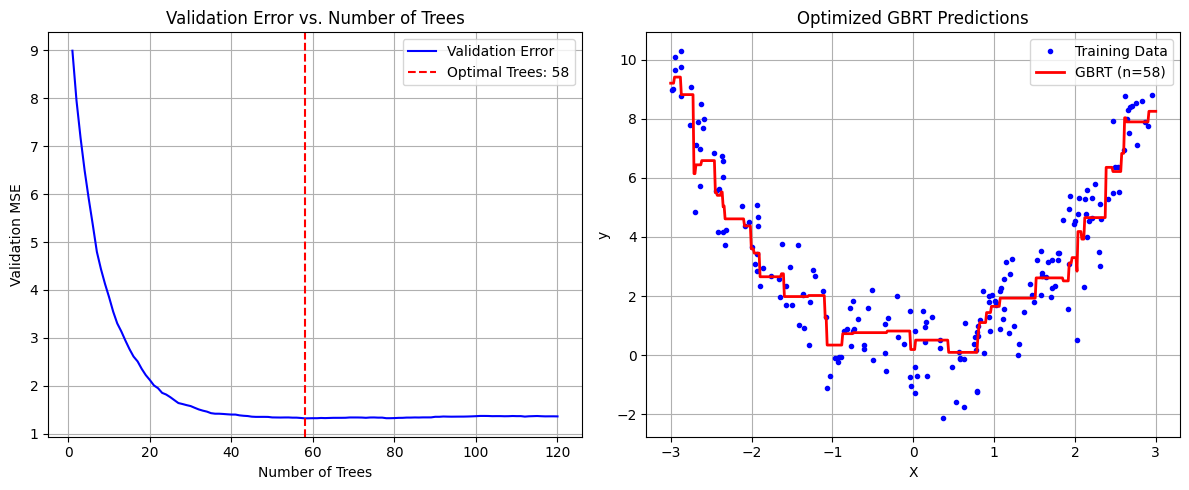

In [6]:
# The next step is to create a GBRT with 120 estimators, 
# then measures the validation error at each stage of training to find the optimal number of trees,
# and finally trains another GBRT ensemble using the optimal number of trees

# Goal: Find the optimal number of trees for GBRT using validation error analysis
# Step 1: Split the data into training and validation sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

# Step 2: Train a GBRT with more trees than we think we’ll need (e.g. 120)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

# Step 3: Compute validation error at each stage
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]

# Step 4: Find the number of estimators that minimizes the validation error
bst_n_estimators = np.argmin(errors) + 1

# Step 5: Retrain the model with the optimal number of estimators
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

# Step 6: Make predictions for visualization
X_new = np.linspace(-3, 3, 500).reshape(-1, 1)
y_pred_best = gbrt_best.predict(X_new)

# Step 7: Visualize results
plt.figure(figsize=(12, 5))

# Plot validation error curve
plt.subplot(121)
plt.plot(range(1, 121), errors, "b-", label="Validation Error")
plt.axvline(bst_n_estimators, color="r", linestyle="--", label=f"Optimal Trees: {bst_n_estimators}")
plt.xlabel("Number of Trees")
plt.ylabel("Validation MSE")
plt.title("Validation Error vs. Number of Trees")
plt.legend()
plt.grid(True)

# Plot predictions of the best model
plt.subplot(122)
plt.plot(X, y, "b.", label="Training Data")
plt.plot(X_new, y_pred_best, "r-", linewidth=2, label=f"GBRT (n={bst_n_estimators})")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Optimized GBRT Predictions")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

d:\hands_on_machine_learning\C7 - Ensemble Learning and Random Forests\env\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
d:\hands_on_machine_learning\C7 - Ensemble Learning and Random Forests\env\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
d:\hands_on_machine_learning\C7 - Ensemble Learning and Random Forests\env\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  

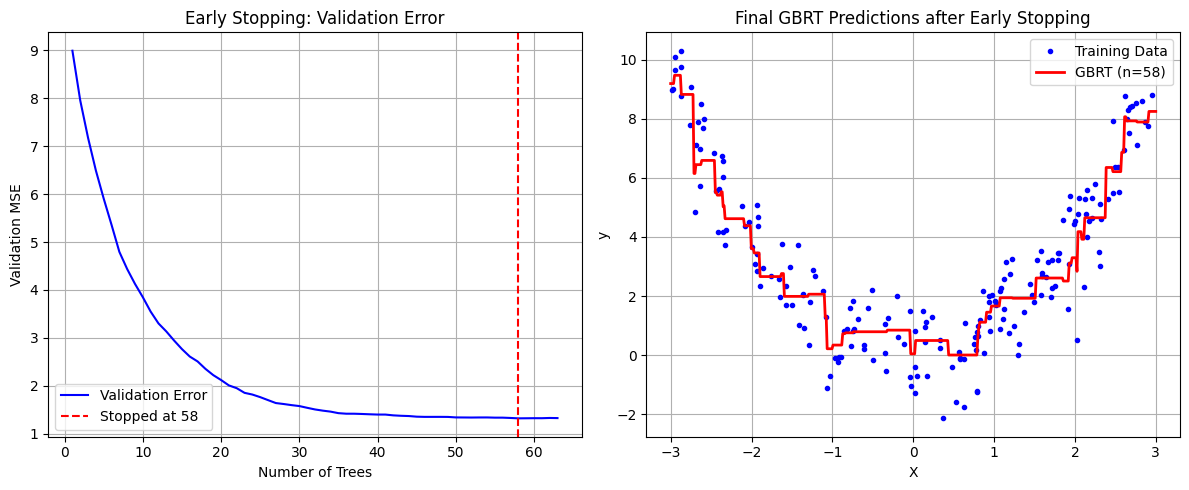

In [7]:
# Gradient Boosting with Early Stopping using warm_start
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Instantiate a Gradient Boosting Regressor with warm_start enabled
# This allows us to add trees incrementally in a loop
gbrt_early_stopping = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")  # Initialize the minimum validation error
error_going_up = 0            # Counter for how many times the error increases
best_n_estimators = 0         # Store the optimal number of trees
val_errors = []               # List to track validation error at each stage

# Loop through a range of estimators, training one additional tree at each iteration
for n_estimators in range(1, 120):
    gbrt_early_stopping.n_estimators = n_estimators  # Incrementally increase the number of trees
    gbrt_early_stopping.fit(X_train, y_train)        # Train model on training data
    y_pred = gbrt_early_stopping.predict(X_val)      # Predict on validation set
    val_error = mean_squared_error(y_val, y_pred)    # Calculate validation mean squared error
    val_errors.append(val_error)

    # Track the lowest validation error seen so far
    if val_error < min_val_error:
        min_val_error = val_error
        best_n_estimators = n_estimators
        error_going_up = 0
    else:
        error_going_up += 1
        # Stop training if validation error increases 5 times in a row (early stopping)
        if error_going_up == 5:
            break

# Generate prediction over a smooth range of X values for visualization
X_new = np.linspace(-3, 3, 500).reshape(-1, 1)
y_pred_best = gbrt_early_stopping.predict(X_new)

# Plotting section

plt.figure(figsize=(12, 5))

# Plot 1: Validation error vs. number of estimators
plt.subplot(121)
plt.plot(range(1, len(val_errors) + 1), val_errors, "b-", label="Validation Error")
plt.axvline(best_n_estimators, color="r", linestyle="--", label=f"Stopped at {best_n_estimators}")
plt.xlabel("Number of Trees")
plt.ylabel("Validation MSE")
plt.title("Early Stopping: Validation Error")
plt.legend()
plt.grid(True)

# Plot 2: Model predictions after early stopping
plt.subplot(122)
plt.plot(X, y, "b.", label="Training Data")
plt.plot(X_new, y_pred_best, "r-", linewidth=2, label=f"GBRT (n={best_n_estimators})")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Final GBRT Predictions after Early Stopping")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

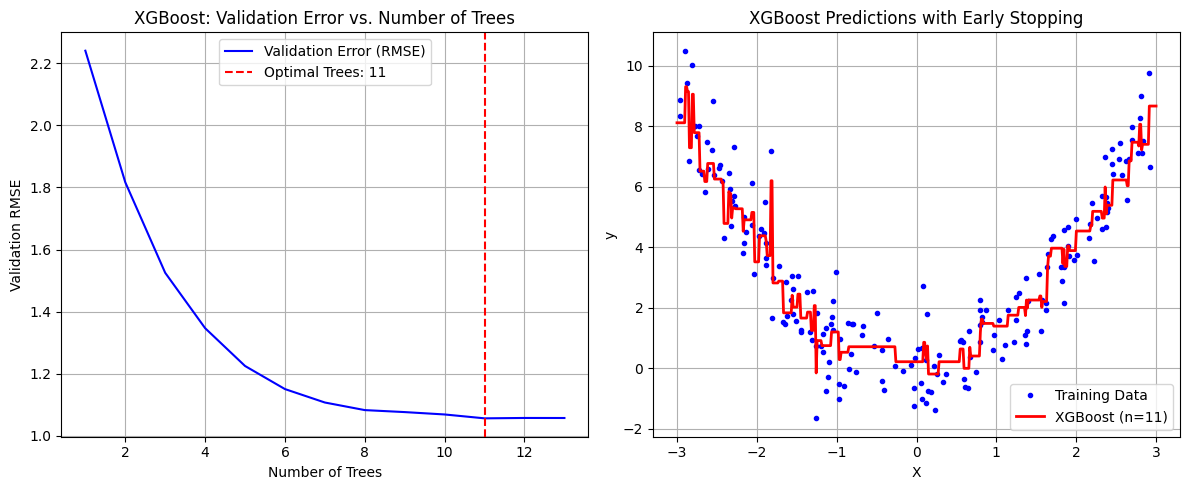

In [8]:
# Gradient Boosting using XGBoost with Early Stopping
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

# Generate a synthetic dataset based on a noisy quadratic function
np.random.seed(42)
m = 200
X = np.random.rand(m, 1) * 6 - 3               # Generate X values in the range [-3, 3]
y = X**2 + np.random.randn(m, 1)               # Quadratic relationship with added Gaussian noise

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the XGBoost Regressor with early stopping
xgb_reg = xgb.XGBRegressor(
    eval_metric="rmse",                # Use RMSE as the evaluation metric
    early_stopping_rounds=2,           # Stop training if validation error doesn't improve for 2 rounds
    random_state=42
)

# Fit the model to the training data and evaluate on validation data
xgb_reg.fit(
    X_train, y_train.ravel(),                  # Flatten y for compatibility with XGBoost
    eval_set=[(X_val, y_val.ravel())],         # Provide validation set for early stopping
    verbose=False                              # Suppress detailed training output
)

# Retrieve the optimal number of boosting rounds (trees)
best_n_estimators = xgb_reg.best_iteration + 1

# Generate predictions on a smooth range of X values for visualization
X_new = np.linspace(-3, 3, 500).reshape(-1, 1)
y_pred_best = xgb_reg.predict(X_new)

# Extract validation RMSE errors recorded during training
results = xgb_reg.evals_result()
errors = results["validation_0"]["rmse"]  # RMSE per boosting round

plt.figure(figsize=(12, 5))

# Plot 1: Validation error as a function of the number of trees
plt.subplot(121)
plt.plot(range(1, len(errors) + 1), errors, "b-", label="Validation Error (RMSE)")
plt.axvline(best_n_estimators, color="r", linestyle="--", label=f"Optimal Trees: {best_n_estimators}")
plt.xlabel("Number of Trees")
plt.ylabel("Validation RMSE")
plt.title("XGBoost: Validation Error vs. Number of Trees")
plt.legend()
plt.grid(True)

# Plot 2: Model predictions after early stopping
plt.subplot(122)
plt.plot(X, y, "b.", label="Training Data")
plt.plot(X_new, y_pred_best, "r-", linewidth=2, label=f"XGBoost (n={best_n_estimators})")
plt.xlabel("X")
plt.ylabel("y")
plt.title("XGBoost Predictions with Early Stopping")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()